> ### EEE4423: Deep Learning Lab

# LAB \#14: CycleGAN

<h4><div style="text-align: right"> Due date: JUNE 10, 2022.  </div> <br>
<div style="text-align: right"> Please upload your file @ LearnUs in the form of [ID_Name_Lab14.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span> 
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2018142102] [Euijin Hong]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2023-06-03 08:10:07.360083


## 1. Implementation for CycleGAN
>
>
> <img src="https://camo.githubusercontent.com/16fa02525bf502bec1aac77a3eb5b96928b0f25d73f7d9dedcc041ba28c38751/68747470733a2f2f6a756e79616e7a2e6769746875622e696f2f4379636c6547414e2f696d616765732f7465617365725f686967685f7265732e6a7067" alt="no_image" style="width: 800px;"/><br>
>
> * Cycle GAN leverages a cycle consistency in image-to-image translation
> * Unlike a conditional GAN, the cycle GAN considers <U>unpaired training data</U>
>
> **1. Dataset**
>
>   * MNIST dataset
>   * SVHN dataset
>   * Note that the MNIST data is gray, where the number of the channel is 1
>
> **2. Network architecture**
>
>   * **Overall architecture**
>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/model.jpg" alt="no_image" style="width: 600px;"/><br>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/model1.jpg" alt="no_image" style="width: 600px;"/><br>
>   * **Generative model G**
>     * Xavier initialization (Glorot & Bengio [3])
>       * It makes sure the weights to keep the propagation in a reasonable range through many layers
>       * $V(W)= {2 \over n_{in}+n_{out}}$
>       * Use <code>nn.init.xavier_uniform_</code> for the Xavier initialization
>
>     * The generative model has three components:
>       1. Encoder: 
>         * Convolutional network for feature extracting
>         * 2 convolutional layers and 2 LeakyReLU activations
>         * The output channel sizes are 64, 128 respectively<br>
>         * The kernel size of the convolutional layers are 7 and 3, respectively<br>
>            (You can use different sizes whatever you want, but we recommend those sizes)
>         * All the strides are 2
>         * Use batch normalization except for the first layer
>
>       2. Transformer: 
>         * Learn how it would like to transform the feature vector of and image from A to B. <br> 
>         * Use the resnet blok which contains the skip-connetction between the input and output for transformation<br>
>            (Please refer to <U>He et al.</U>[3])
>         * 3 resnet block layers and each of layer is followed by LeakyReLU activation
>         * All the output channel sizes are 128
>         * All the kernel sizes and strides are 3 and 1, respectively
>      
>       3. Decoder: 
>         * Upconvolutional network for reconstructing an image
>         * 2 upconvolutional layers, one LeakyReLU activations, and one Tanh activation which is for the last layer
>         * The output channel sizes are 128, 64, and 3, respectively for the SVHN data, and 128, 64, and 1, respectively for the MNIST data <br>
>         * All the kernel sizes and strides are 4 and 2, respectively
>         * Use batch normalization except for the last layers
>
>
>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/Generator.jpg" alt="no_image" style="width: 800px;"/><br>
>
>
>   * **Discriminative model D**
>     * Xavier Initialization
>     * It contains 4 convolutional layers, 3 LeakyReLU activations, and one Sigmoid activation which is for the last layer
>     * The output channel sizes are 64, 128, 256, and 1, respectively
>     * All the kernel sizes are 4 except for the last kernel size which is 1
>     * The strides from the first two layers are 2 and the rest of them are 1
>     * Use batch normalization([4]) except for the first and last layers
>
>
>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/discriminator.jpg" alt="no_image" style="width: 600px;"/><br>
>
>
> **3. Loss function**<br>
> (In the paper, the authors use the L2 loss for the GAN loss, but the binary cross entropy loss also works well)
>  * **Discriminative model $D_X$ and $D_Y$**
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(y_i))+(1-l_i^{real})log(1-D_Y(y_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_Y(G_Y(x_i)))+(1-l_i^{fake})log(1-D_Y(G_Y(x_i)))$ <br>
>
>  *
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(x_i))+(1-l_i^{real})log(1-D_X(x_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_X(G_X(y_i)))+(1-l_i^{fake})log(1-D_X(G_X(y_i)))$ <br>
>
>    ($l_i^{real}=1, l_i^{fake}=0$) <br>
>    ($G_Y$ is the generator where $x_i$ translate to $y_i$ and vice versa)
>
>
>  * **Generative model $G_X$ and $G_Y$**<br>
>
>      * Binary cross entropy loss for the real data (It is actually fake)
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(G_X(y_i)))+(1-l_i^{real})log(1-D_X(G_X(y_i))) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(G_Y(x_i)))+(1-l_i^{real})log(1-D_Y(G_Y(x_i))) $ <br>
>
>    ($l_i^{real}=1$)
>    
>      * The cycle loss for measuring difference between $x_i$ and $G_Y(G_X(x_i))$ and vice versa
>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_Y(G_X(y_i))-y_i \rvert\rvert_1$ <br>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_X(G_Y(x_i))-x_i \rvert\rvert_1$

## 2. Cycle GAN with Pytorch

In [148]:
import os
import os.path as osp
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Parameter Setting
* You can adjust the parameters to yourself

In [149]:
print('STEP 0: PARAMETER SETTING')

# Data root directory
train_X_root = './dataset-dllab/lab14/mnist/'
train_Y_root = './dataset-dllab/lab14/svhn/'

# Weight save directory
vis_num = 2
save_dir = './weights/lab14/cyclegan'
if not osp.exists(save_dir):
    os.makedirs(save_dir)

# Batch size during training
bs = 64

# Size of image
img_height = 32
img_width = 32
img_size = 32
img_channel = 3

# Channels of generator feature
gfc = 64

# Channels of discriminator feature
dfc = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizing
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Real or Fake label
real_label = 1
fake_label = 0

STEP 0: PARAMETER SETTING


In [150]:
print('STEP 1: LOADING DATASET')

transform_1ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

transform_3ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_X_set = dset.MNIST(root=train_X_root,
                         train=True,
                         transform=transform_1ch,
                         download=False)
train_Y_set = dset.SVHN(root=train_Y_root,
                        split='train',
                        transform=transform_3ch,
                        download=False)
test_X_set = dset.MNIST(root=train_X_root,
                         train=False,
                         transform=transform_1ch,
                         download=False)
test_Y_set = dset.SVHN(root=train_Y_root,
                        split='test',
                        transform=transform_3ch,
                        download=False)

STEP 1: LOADING DATASET


In [151]:
print('STEP 2: MAKING DATASET ITERABLE')

train_X_loader = torch.utils.data.DataLoader(train_X_set,
                                             batch_size=bs, 
                                             shuffle=True,
                                             drop_last=True)

train_Y_loader = torch.utils.data.DataLoader(train_Y_set,
                                             batch_size=bs, 
                                             shuffle=True,
                                             drop_last=True)

test_X_loader = torch.utils.data.DataLoader(test_X_set,
                                             batch_size=bs, 
                                             shuffle=False,
                                             drop_last=True)

test_Y_loader = torch.utils.data.DataLoader(test_Y_set,
                                             batch_size=bs, 
                                             shuffle=False,
                                             drop_last=True)

STEP 2: MAKING DATASET ITERABLE


### Visualize a few images

In [152]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

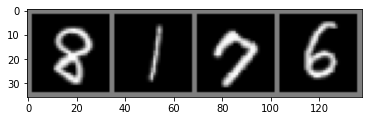

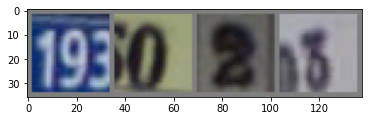

In [153]:
data_loader_X_sample = torch.utils.data.DataLoader(train_X_set,
                                                 batch_size=4, 
                                                 shuffle=True)
data_loader_Y_sample = torch.utils.data.DataLoader(train_Y_set,
                                                 batch_size=4, 
                                                 shuffle=True)

# Get a batch of training data
X = next(iter(data_loader_X_sample))
Y = next(iter(data_loader_Y_sample))

# Make a grid from batch
out_X = torchvision.utils.make_grid(X[0])
out_Y = torchvision.utils.make_grid(Y[0])

imshow(out_X)
imshow(out_Y)

### Utils 
* Use the below code for the convolution or the upconvolution

### *References*
[1] Zhu et al., "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks", *ICCV*, 2017. <br>
[2] https://hardikbansal.github.io/CycleGANBlog/ <br>
[3] Glorot & Bengio, "Understanding the difficulty of training deep feedforward neural networks", *AISTATS* 2010. <br>
[4] Ioffe & Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", *ICML* 2015.

In [168]:
def conv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)
        
    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]
        
    return nn.Sequential(*layers)
        
def upconv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)
        
    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]
        
    return nn.Sequential(*layers)

def transpose(ndarray):
    return np.transpose(ndarray, [0,2,3,1])

def gray2rgb(ndarray):
    return np.concatenate((ndarray, ndarray, ndarray), axis=2)

### 2.1 Write the code (Generator) [3 points]
* You need to set the hyperparameters for implementing the upconvolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [184]:
print('STEP 3-1: CREATE MODEL CLASS (Generator)')


# [input channels, output channels, kernel_size, strides, paddings]
# channel_in, channel_out, kernel_size, stride, padding, activation = params_list

# Generator X: from SVHN to MNIST, Generator Y: from MNIST to SVHN
cfg_g_enc_X = [[1, gfc, 7, 2, 3, 'LeakyReLU'], [gfc, 2*gfc, 3, 2, 1, 'LeakyReLU']]
cfg_g_enc_Y = [[3, gfc, 7, 2, 3, 'LeakyReLU'], [gfc, 2*gfc, 3, 2, 1, 'LeakyReLU']]
cfg_g_trans = [[2*gfc, 2*gfc, 3, 1, 1, ''], [2*gfc, 2*gfc, 3, 1, 1, ''], [2*gfc, 2*gfc, 3, 1, 1, '']]
cfg_g_dec_X = [[2*gfc, 2*gfc, 4, 2, 2, 'LeakyReLU'], [2*gfc, gfc, 4, 2, 2, 'LeakyReLU'], [gfc, 3, 7, 1, 3, 'Tanh']]
cfg_g_dec_Y = [[2*gfc, 2*gfc, 4, 2, 2, 'LeakyReLU'], [2*gfc, gfc, 4, 2, 2, 'LeakyReLU'], [gfc, 1, 7, 1, 3, 'Tanh']]


class Generator_X(nn.Module):
    def __init__(self):
        super(Generator_X, self).__init__()
        
        #############
        # Encoder
        self.conv1 = conv2d(cfg_g_enc_X[0], batch_norm=False)
        self.conv2 = conv2d(cfg_g_enc_X[1])
        
        # Transformer
        self.conv3 = conv2d(cfg_g_trans[0])
        self.conv4 = conv2d(cfg_g_trans[1])
        self.conv5 = conv2d(cfg_g_trans[2])
        self.LeakyReLU = nn.LeakyReLU(0.2, inplace=True)
        
        # Decoder
        self.deconv1 = upconv2d(cfg_g_dec_X[0])
        self.deconv2 = upconv2d(cfg_g_dec_X[1])
        self.conv6 = conv2d(cfg_g_dec_X[2], batch_norm=False)
        #############
        
    def forward(self, x):
        
        #############
        # Encoder
        x = self.conv1(x)
        x = self.conv2(x)
        
        # Transformer
        x = self.conv3(x) + x
        x = self.LeakyReLU(x)
        x = self.conv4(x) + x
        x = self.LeakyReLU(x)
        x = self.conv5(x) + x
        x = self.LeakyReLU(x)
        
        # Decoder
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.deconv1(x)
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.deconv2(x)
        x = self.conv6(x)
        
        return x
        #############
    
class Generator_Y(nn.Module):
    def __init__(self):
        super(Generator_Y, self).__init__()
        
        #############
        # Encoder
        self.conv1 = conv2d(cfg_g_enc_Y[0], batch_norm=False)
        self.conv2 = conv2d(cfg_g_enc_Y[1])
        
        # Transformer
        self.conv3 = conv2d(cfg_g_trans[0])
        self.conv4 = conv2d(cfg_g_trans[1])
        self.conv5 = conv2d(cfg_g_trans[2])
        self.LeakyReLU = nn.LeakyReLU(0.2, inplace=True)
        
        # Decoder
        self.deconv1 = upconv2d(cfg_g_dec_Y[0])
        self.deconv2 = upconv2d(cfg_g_dec_Y[1])
        self.conv6 = conv2d(cfg_g_dec_Y[2], batch_norm=False)
        #############
        
        
    def forward(self, x):
        
        #############
        # Encoder
        x = self.conv1(x)
        x = self.conv2(x)
        
        # Transformer
        x = self.conv3(x) + x
        x = self.LeakyReLU(x)
        x = self.conv4(x) + x
        x = self.LeakyReLU(x)
        x = self.conv5(x) + x
        x = self.LeakyReLU(x)
        
        # Decoder
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.deconv1(x)
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.deconv2(x)
        x = self.conv6(x)
        
        return x
        #############  
        

STEP 3-1: CREATE MODEL CLASS (Generator)


### 2.2 Write the code (Discriminator) [3 points]
* You need to set the hyperparameters for implementing the convolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [185]:
print('STEP 3-2: CREATE MODEL CLASS (Discriminator)')


# [input channels, output channels, kernel_size, strides, paddings]
# channel_in, channel_out, kernel_size, stride, padding, activation = params_list

# Discriminator X: determine the MNIST image, Discriminator Y: determine the SVHN image
cfg_d_X = [[1, dfc, 4, 2, 1, 'LeakyReLU'], [dfc, 2*dfc, 4, 2, 1, 'LeakyReLU'], 
           [2*dfc, 4*dfc, 4, 1, 1, 'LeakyReLU'], [4*dfc, 1, 1, 1, 0, 'Sigmoid']]
cfg_d_Y = [[3, dfc, 4, 2, 1, 'LeakyReLU'], [dfc, 2*dfc, 4, 2, 1, 'LeakyReLU'], 
           [2*dfc, 4*dfc, 4, 1, 1, 'LeakyReLU'], [4*dfc, 1, 1, 1, 0, 'Sigmoid']]


class Discriminator_X(nn.Module):
    def __init__(self):
        super(Discriminator_X, self).__init__()
        
        #############
        self.conv1 = conv2d(cfg_d_X[0], batch_norm=False)
        self.conv2 = conv2d(cfg_d_X[1])
        self.conv3 = conv2d(cfg_d_X[2])
        self.conv4 = conv2d(cfg_d_X[3], batch_norm=False)
        #############
        
    def forward(self, x):
        
        #############
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.conv1(x)
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.conv2(x)
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.conv3(x)
        x = self.conv4(x)
        
        return x
        #############
    
class Discriminator_Y(nn.Module):
    def __init__(self):
        super(Discriminator_Y, self).__init__()
        
        #############
        self.conv1 = conv2d(cfg_d_Y[0], batch_norm=False)
        self.conv2 = conv2d(cfg_d_Y[1])
        self.conv3 = conv2d(cfg_d_Y[2])
        self.conv4 = conv2d(cfg_d_Y[3], batch_norm=False)
        #############
        
    def forward(self, x):
        
        #############
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.conv1(x)
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.conv2(x)
        x = F.pad(x, (0, 1, 0, 1), mode='reflect')
        x = self.conv3(x)
        x = self.conv4(x)
        
        return x
        #############
        

STEP 3-2: CREATE MODEL CLASS (Discriminator)


In [186]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model_G_X = Generator_X()
model_G_Y = Generator_Y()
model_D_X = Discriminator_X()
model_D_Y = Discriminator_Y()


#######################
#  USE GPU FOR MODEL  #
#######################


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G_X.to(device)
print(model_G_X)
model_G_Y.to(device)
print(model_G_Y)
model_D_X.to(device)
print(model_D_X)
model_D_Y.to(device)

STEP 4: INSTANTIATE MODEL CLASS
Generator_X(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv5): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1)

Discriminator_Y(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): Sigmoid()
  )
)

In [187]:
print('STEP 5: INSTANTIATE LOSS CLASS')

criterion_GAN = nn.BCELoss()
criterion_L1 = nn.L1Loss()

print('STEP 6: INSTANTIATE OPTIMIZER CLASS')

optimizer_G_X = torch.optim.Adam(model_G_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_G_Y = torch.optim.Adam(model_G_Y.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_X = torch.optim.Adam(model_D_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_Y = torch.optim.Adam(model_D_Y.parameters(), lr=lr, betas=(beta1, 0.999))

STEP 5: INSTANTIATE LOSS CLASS
STEP 6: INSTANTIATE OPTIMIZER CLASS


### 2.3 Train the Cycle GAN [4 points]
* After the training is finished, check out the generated samples
* If the samples are generated well, then you will get the full score

STEP 7: TRAIN THE MODEL
it[0100/4685] 	Loss_D:2.1594 	Loss_G:1.8629 	Loss_C:0.2090 	elapsed_time:0.17mins
it[0200/4685] 	Loss_D:2.4369 	Loss_G:1.7173 	Loss_C:0.2197 	elapsed_time:0.34mins
it[0300/4685] 	Loss_D:2.2485 	Loss_G:1.8488 	Loss_C:0.2033 	elapsed_time:0.51mins
it[0400/4685] 	Loss_D:2.0114 	Loss_G:2.1594 	Loss_C:0.1844 	elapsed_time:0.68mins
it[0500/4685] 	Loss_D:2.0180 	Loss_G:2.0029 	Loss_C:0.1938 	elapsed_time:0.85mins
it[0600/4685] 	Loss_D:1.7568 	Loss_G:2.5171 	Loss_C:0.2036 	elapsed_time:1.02mins
it[0700/4685] 	Loss_D:2.1566 	Loss_G:2.2746 	Loss_C:0.2178 	elapsed_time:1.19mins
it[0800/4685] 	Loss_D:2.0967 	Loss_G:2.1158 	Loss_C:0.1895 	elapsed_time:1.36mins
it[0900/4685] 	Loss_D:1.8958 	Loss_G:2.4379 	Loss_C:0.1877 	elapsed_time:1.53mins
it[1000/4685] 	Loss_D:1.8922 	Loss_G:2.4570 	Loss_C:0.1940 	elapsed_time:1.71mins


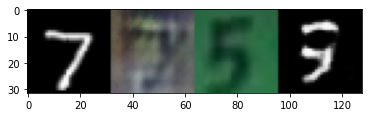

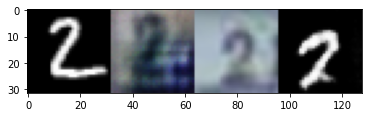

it[1100/4685] 	Loss_D:2.2358 	Loss_G:2.2089 	Loss_C:0.1785 	elapsed_time:1.91mins
it[1200/4685] 	Loss_D:2.1559 	Loss_G:2.4045 	Loss_C:0.1917 	elapsed_time:2.08mins
it[1300/4685] 	Loss_D:2.1539 	Loss_G:2.0698 	Loss_C:0.2156 	elapsed_time:2.25mins
it[1400/4685] 	Loss_D:2.0029 	Loss_G:2.3025 	Loss_C:0.1947 	elapsed_time:2.42mins
it[1500/4685] 	Loss_D:1.9951 	Loss_G:2.3934 	Loss_C:0.1866 	elapsed_time:2.59mins
it[1600/4685] 	Loss_D:2.0983 	Loss_G:2.4349 	Loss_C:0.1966 	elapsed_time:2.76mins
it[1700/4685] 	Loss_D:2.2105 	Loss_G:1.8653 	Loss_C:0.2143 	elapsed_time:2.92mins
it[1800/4685] 	Loss_D:2.0571 	Loss_G:2.5023 	Loss_C:0.1797 	elapsed_time:3.08mins
it[1900/4685] 	Loss_D:2.3976 	Loss_G:1.8690 	Loss_C:0.1944 	elapsed_time:3.25mins
it[2000/4685] 	Loss_D:2.4768 	Loss_G:1.9455 	Loss_C:0.1909 	elapsed_time:3.42mins


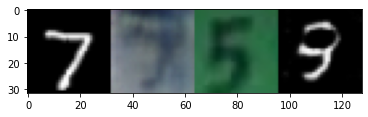

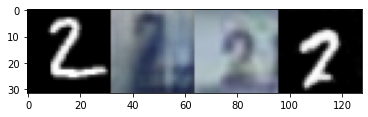

it[2100/4685] 	Loss_D:2.4589 	Loss_G:2.1754 	Loss_C:0.1921 	elapsed_time:3.62mins
it[2200/4685] 	Loss_D:2.1040 	Loss_G:2.3172 	Loss_C:0.2267 	elapsed_time:3.79mins
it[2300/4685] 	Loss_D:2.2505 	Loss_G:1.7057 	Loss_C:0.1900 	elapsed_time:3.96mins
it[2400/4685] 	Loss_D:2.3429 	Loss_G:1.5770 	Loss_C:0.1840 	elapsed_time:4.13mins
it[2500/4685] 	Loss_D:2.1371 	Loss_G:2.3864 	Loss_C:0.1903 	elapsed_time:4.30mins
it[2600/4685] 	Loss_D:2.1798 	Loss_G:1.8410 	Loss_C:0.2008 	elapsed_time:4.47mins
it[2700/4685] 	Loss_D:2.1633 	Loss_G:2.5284 	Loss_C:0.2042 	elapsed_time:4.65mins
it[2800/4685] 	Loss_D:2.1834 	Loss_G:1.8709 	Loss_C:0.1855 	elapsed_time:4.82mins
it[2900/4685] 	Loss_D:2.2673 	Loss_G:2.0744 	Loss_C:0.2050 	elapsed_time:5.01mins
it[3000/4685] 	Loss_D:2.1868 	Loss_G:2.1453 	Loss_C:0.1800 	elapsed_time:5.19mins


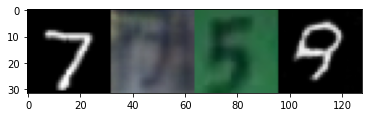

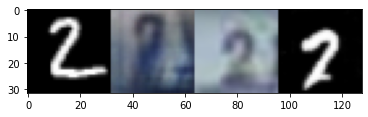

it[3100/4685] 	Loss_D:2.2289 	Loss_G:1.8830 	Loss_C:0.1850 	elapsed_time:5.41mins
it[3200/4685] 	Loss_D:2.2480 	Loss_G:2.1179 	Loss_C:0.1860 	elapsed_time:5.59mins
it[3300/4685] 	Loss_D:2.2029 	Loss_G:1.8511 	Loss_C:0.1747 	elapsed_time:5.76mins
it[3400/4685] 	Loss_D:2.2110 	Loss_G:2.3223 	Loss_C:0.1886 	elapsed_time:5.93mins
it[3500/4685] 	Loss_D:2.1834 	Loss_G:2.0204 	Loss_C:0.1901 	elapsed_time:6.10mins
it[3600/4685] 	Loss_D:2.2195 	Loss_G:1.8013 	Loss_C:0.1886 	elapsed_time:6.27mins
it[3700/4685] 	Loss_D:2.3744 	Loss_G:1.9687 	Loss_C:0.2044 	elapsed_time:6.45mins
it[3800/4685] 	Loss_D:2.3337 	Loss_G:1.7656 	Loss_C:0.1751 	elapsed_time:6.62mins
it[3900/4685] 	Loss_D:2.2964 	Loss_G:2.3634 	Loss_C:0.1737 	elapsed_time:6.79mins
it[4000/4685] 	Loss_D:2.3434 	Loss_G:1.9186 	Loss_C:0.1879 	elapsed_time:6.97mins


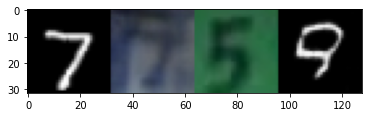

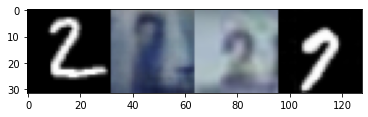

it[4100/4685] 	Loss_D:2.2209 	Loss_G:1.8520 	Loss_C:0.2150 	elapsed_time:7.16mins
it[4200/4685] 	Loss_D:2.1358 	Loss_G:1.8793 	Loss_C:0.1735 	elapsed_time:7.32mins
it[4300/4685] 	Loss_D:2.2921 	Loss_G:1.9944 	Loss_C:0.1739 	elapsed_time:7.49mins
it[4400/4685] 	Loss_D:2.0811 	Loss_G:2.0227 	Loss_C:0.1986 	elapsed_time:7.66mins
it[4500/4685] 	Loss_D:2.0887 	Loss_G:2.2357 	Loss_C:0.1826 	elapsed_time:7.83mins
it[4600/4685] 	Loss_D:2.0208 	Loss_G:2.1186 	Loss_C:0.1726 	elapsed_time:7.99mins


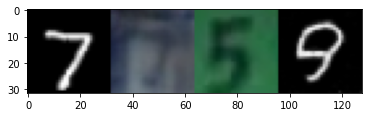

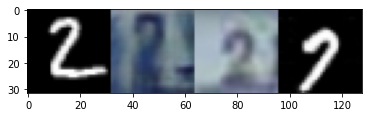

In [188]:
print('STEP 7: TRAIN THE MODEL')

label_real = torch.full((bs, 1, 8, 8), real_label, dtype=torch.float32, device=device)
label_fake = torch.full((bs, 1, 8, 8), fake_label, dtype=torch.float32, device=device)

num_iter = 0
max_iter = num_epochs*len(train_X_loader)

train_start_time = time.time()
for epoch in range(1, num_epochs+1):
    for batch_index, data_X in enumerate(train_X_loader):
        model_G_X.train()
        model_G_Y.train()
        model_D_X.train()
        model_D_Y.train()
        
        data_X = data_X[0].to(device)
        data_Y = next(iter(train_Y_loader))[0].to(device)
        
        ### Update discriminator model
        
        #############
        # Clear gradients w.r.t. parameters
        model_D_X.zero_grad()
        model_D_Y.zero_grad()
        
        # Forward pass to get results of discriminator for real data
        output_D_X_real = model_D_X(data_X)
        output_D_Y_real = model_D_Y(data_Y)

        # Calculate Loss of real data
        err_D_X_real = criterion_GAN(output_D_X_real, label_real)
        err_D_Y_real = criterion_GAN(output_D_Y_real, label_real)
        
        # Forward pass to get generated samples
        fake_Y = model_G_X(data_X)
        fake_X = model_G_Y(data_Y)
        
        # Forward pass to get results of discriminator for fake data
        output_D_X_fake = model_D_X(fake_X.detach())
        output_D_Y_fake = model_D_Y(fake_Y.detach())

        # Calculate Loss of fake data
        err_D_X_fake = criterion_GAN(output_D_X_fake,label_fake)
        err_D_Y_fake = criterion_GAN(output_D_Y_fake,label_fake)
        
        # Combine the losses for real data and fake data
        err_D = err_D_X_real + err_D_Y_real + err_D_X_fake + err_D_Y_fake

        # Getting gradients w.r.t. parameters
        err_D.backward()
        
        # Updating parameters
        optimizer_D_X.step()
        optimizer_D_Y.step()
        #############
        

        ### Update generator model
        
        #############
        # Clear gradients w.r.t. parameters
        model_G_X.zero_grad()
        model_G_Y.zero_grad()
        
        # Forward pass to get results of discriminator for fake data
        output_G_X = model_D_X(fake_X)
        output_G_Y = model_D_Y(fake_Y)
        
        # Calculate Loss between fake data and real label
        err_G_X = criterion_GAN(output_G_X,label_real)
        err_G_Y = criterion_GAN(output_G_Y,label_real)
        
        # Regenerate data
        fake_YXY = model_G_X(fake_X)
        fake_XYX = model_G_Y(fake_Y)
        
        # Calculate Cyclic Loss
        err_L1_X = criterion_L1(fake_XYX,data_X)
        err_L1_Y = criterion_L1(fake_YXY,data_Y)
        
        # Combine the GAN losses
        err_G = err_G_X + err_G_Y 

        # Combine the Cyclic losses
        err_C = err_L1_X + err_L1_Y

        # Combine GAN and Cyclic loss
        err_GC = err_G + 10.0*err_C
        
        # Getting gradients w.r.t. parameters
        err_GC.backward()
        
        # Update Parameters
        optimizer_G_X.step()
        optimizer_G_Y.step()
        #############
        
        
        num_iter += 1
        # Output training stats
        if num_iter%100 == 0:
            print('it[{:04d}/{:04d}] \tLoss_D:{:.4f} \tLoss_G:{:.4f} \tLoss_C:{:.4f} \telapsed_time:{:.2f}mins'.format(
                num_iter, max_iter, err_D.item(), err_G.item(), err_C.item(), (time.time()-train_start_time)/60 
            ))

        if num_iter%1000==0 or num_iter==max_iter:
            save_name = osp.join(save_dir, 'it{:04d}.pt'.format(num_iter))
            torch.save({
                'model_G_X': model_G_X.state_dict(),
                'model_G_Y': model_G_Y.state_dict()
            }, save_name)
    
            with torch.no_grad():
                model_G_X.eval()
                model_G_Y.eval()
                for test_index, data_X in enumerate(test_X_loader):
                    if test_index == 0:
                        
                        data_X = data_X[0].to(device)
                        data_Y = next(iter(test_Y_loader))[0].to(device)

                        output_X = model_G_X(data_X)
                        output_Y = model_G_Y(data_Y)
                        
                        data_X = ((data_X+1)/2).cpu().data.numpy()
                        data_Y = ((data_Y+1)/2).cpu().data.numpy()

                        output_X = ((output_X + 1)/2).cpu().data.numpy()
                        output_Y = ((output_Y + 1)/2).cpu().data.numpy()
                
                        for vis_idx in range(vis_num):
                            data_X_, data_Y_ = gray2rgb(transpose(data_X)[vis_idx]), transpose(data_Y)[vis_idx]
                            output_X_, output_Y_  = transpose(output_X)[vis_idx], gray2rgb(transpose(output_Y)[vis_idx])
                            outputs = np.concatenate((data_X_, output_X_, data_Y_, output_Y_), axis=1)
                            plt.imshow(outputs)
                            plt.pause(0.001)

# Discussion
- 이번 주차 실험에서 Cyclic GAN은 MNIST와 SVHN 두 종류의 dataset이 한 쌍을 이루어, 한 가지 데이터셋으로 다른 종류의 데이터셋을 만들어 내는 2개의 Generator와, 각각의 Generator에 의해 생성된 각각의 데이터셋의 참/거짓을 판별하는 2개의 Discriminator로 구성되어 있다. 여기서 Generator X는 MNIST로부터 SVHN을 만들어내고, Generator Y는 SVHN으로부터 MNIST를 만들어낸다. Discriminator X는 Generator Y에 의해 생성된 MNIST와 실제 MNIST의 참/거짓을 판별하고, Discriminator Y는 Generator X에 의해 생성된 SVHN과 실제 SVHN의 참/거짓을 판별한다. 
- Cyclic GAN의 골자는 서로의 input과 output이 맞물려 있는 Generator 두 개를 설정함으로써 특정 Generator가 생성하는 결과물이 원본에 지나치게 편향되는 것을 방지하는 것이다. 이를 위해 cyclic loss가 정의되었고, 이는 L1 loss를 사용한다. 이때 cyclic loss에는 가중치 lambda에 해당하는 값으로 10을 곱해 주었다. 
- 원래 cyclic GAN에는 L2 loss가 쓰이지만, 해당 실험에서는 binary cross entropy loss (BCE loss)를 사용했고, BCE loss로도 양호한 결과가 나옴을 정량적으로 그리고 정성적으로 알 수 있었다. 
- 우선, 정량적으로는 Discriminator와 Generator의 loss가 어느 한 쪽으로 치우쳐지지 않고 일정한 범위 내의 값들로 유지되는 것을 볼 수 있는데, 이를 통해 Discriminator와 Generator 중 어느 한 모델의 성능이 특별히 더 우월해지지 않고 비슷한 정도로 학습되고 있음을 추론할 수 있다. 실제로 Loss_D, Loss_G, 그리고 Loss_C값들은 학습 초기의 값들과 학습 도중의 값들, 그리고 학습을 마친 시점에서의 값들이 모두 유사한 수치로 나타남을 알 수 있다. 
- 사실 loss값만으로는 정량적으로 cyclic GAN에서 Generator와 Discriminator가 제대로 학습되고 있는지 명학히 알 수는 없다. 따라서 정성적인 평가를 위해 학습 경과에 따라 각각의 Generator가 생성하는 output을 출력하여 비교해 보았다. 두 개의 Generator X와 Y가 각각 만들어내는 output MNIST와 SVHN image의 퀄리티가 학습을 거듭할수록 증가하는 것을 볼 수 있다. 우선 Generator X와 같은 경우 주어진 MNIST label과 동일한 숫자의 SVHN 숫자를 만들어 내는 것을 확인할 수 있다. 반면, Generator Y와 같은 경우 학습 초기의 epoch에서는 불완전하지만 주어진 SVHN의 label과 같은 label의 숫자를 만들어내는 것처럼 보였는데(5, 2), 학습을 거듭할수록 원형보다는 MNIST에 더 가깝긴 하지만 다른 label의 숫자를 출력하는 것을 볼 수 있었다(9, 7). 이는 Discriminator가 참/거짓을 판별할 때 Generator의 생성물이 원래 label과 같은지를 판별하는 것이 아닌 실제 MNIST data와 유사한지를 판별하기 때문이며, Generator는 이에 따라 label과 무관하게 '진짜 MNIST 같은' 데이터를 만들어낸 것이다. 